# Regression

## K-최근접 이웃 회귀

### 생선 데이터 가져오기 

In [19]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 
                        19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 
                        22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 
                        24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 
                        27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
                        36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 
                        40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 
                         85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 
                         120.0, 130.0, 135.0, 110.0, 130.0,150.0, 145.0,
                         150.0, 170.0, 225.0, 145.0, 188.0, 180.0,197.0,
                         218.0,300.0, 260.0, 265.0, 250.0, 250.0, 300.0,
                         320.0, 514.0, 556.0, 840.0,685.0, 700.0, 700.0,
                         690.0, 900.0, 650.0, 820.0, 850.0, 900.0,
                         1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0])


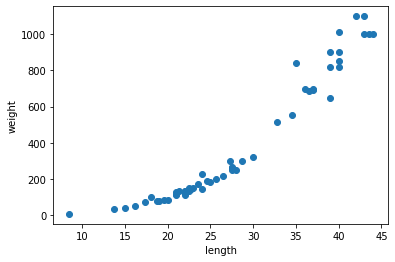

In [20]:
# 산점도 그려서 확인
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 훈련세트와 테스트 세트 준비

In [24]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

print(train_input.shape, test_input.shape)

# reshape(-1, 1): -1 -> 행의 크기를 자동 지정
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1) # 2차원 배열로 변경

print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


### K-최근접 이웃 회귀 알고리즘 정확도 계산 ($R^2$)


In [29]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

print(f"knr.score: {knr.score(train_input, train_target)}")
print(f"test.score: {knr.score(test_input, test_target)}")

knr.score: 0.9698823289099254
test.score: 0.992809406101064


### 평균 절대 오차


In [30]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


### 과대적합 vs 과소적합

In [31]:
print(f"knr.score_train: {knr.score(train_input, train_target)}")
print(f"knr.score_test: {knr.score(test_input, test_target)}")

# 이웃의 갯수를 3으로 설정
knr.n_neighbors = 3

# 모델 다시 훈련
knr.fit(train_input, train_target)

print(f"knr.score_train_new: {knr.score(train_input, train_target)}")
print(f"knr.score_test_new: {knr.score(test_input, test_target)}")

knr.score_train: 0.9698823289099254
knr.score_test: 0.992809406101064
knr.score_train_new: 0.9804899950518966
knr.score_test_new: 0.9746459963987609


### 이웃의 수에 따른 그래프 비교

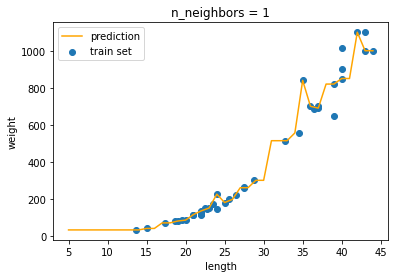

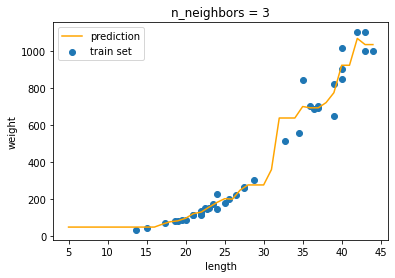

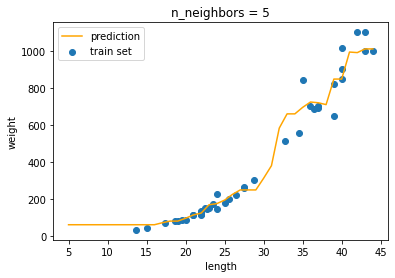

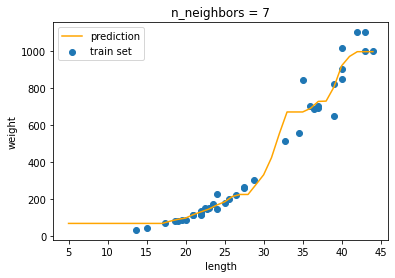

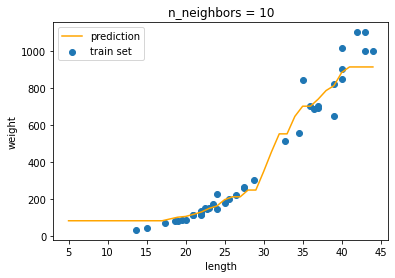

In [35]:
# k-최근접 이웃 회귀 객체 생성
knr = KNeighborsRegressor()
# x:농어의 길이(5 ~ 45까지 범위 설정)
x = np.arange(5, 45).reshape(-1, 1)

# n=1, 5, 10일때 예측 결과 그래프
for n in [1, 3, 5, 7, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x(농어의 길이)에 대한 농어 무게 예측하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target, label='train set')
    plt.plot(x, prediction, label='prediction', color='orange')
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.legend()
    plt.show()